# Loading the tflite model

In [1]:
model_path = r"posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite"

In [2]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()



# Test with an Image

In [3]:
import cv2
img = cv2.imread('yoga.jpg')

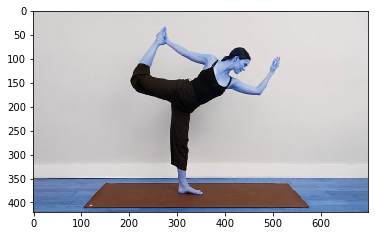

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [20]:
input_shape = tuple(input_details[0]['shape'][1:-1])
scaled_input = cv2.resize(img, input_shape)
scaled_input_as_tensor = tf.convert_to_tensor(scaled_input.reshape(1, *scaled_input.shape).astype(np.float32))

In [16]:
# Test model on random input data.
# input_shape = input_details[0]['shape']
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
# input_data = scaled_input_as_tensor
interpreter.set_tensor(input_details[0]['index'], scaled_input_as_tensor)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])


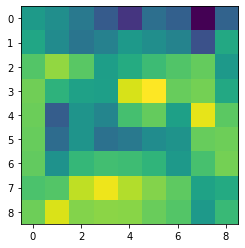

In [29]:
plt.imshow(output_data[0,:,:,11])

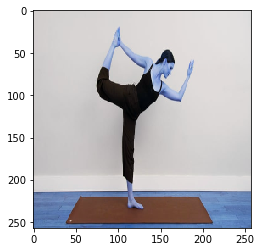

In [21]:
plt.imshow(scaled_input)

In [30]:
output_data[0,:,:,11]

array([[-10.436783 , -10.807783 , -11.469342 , -12.348707 , -13.32308  ,
        -11.767577 , -12.196229 , -14.47324  , -12.111179 ],
       [-10.0738735, -10.908148 , -11.584009 , -11.228915 , -10.456223 ,
        -10.8096895, -11.173056 , -12.648217 ,  -9.99819  ],
       [ -9.0387335,  -8.270085 ,  -8.969101 , -10.3194685,  -9.916219 ,
         -9.381687 ,  -9.075569 ,  -8.807498 , -10.488172 ],
       [ -8.672519 ,  -9.69547  , -10.221165 , -10.28175  ,  -7.5252514,
         -7.0625286,  -8.790529 ,  -8.60666  ,  -9.991703 ],
       [ -8.726252 , -12.275596 , -10.641254 , -11.11042  ,  -9.244887 ,
         -8.817442 , -10.247177 ,  -7.3509035,  -8.924967 ],
       [ -8.775082 , -11.854358 , -10.628264 , -11.705958 , -11.465076 ,
        -10.863074 , -10.676092 ,  -8.771388 ,  -8.699848 ],
       [ -8.829869 , -10.683459 ,  -9.551323 ,  -9.316471 ,  -9.372441 ,
         -9.617159 , -10.460394 ,  -9.212459 ,  -8.616674 ],
       [ -9.154846 ,  -9.058008 ,  -7.7627754,  -7.248377 ,  -